# Question 


#### Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
###### Sales -- Unit sales (in thousands) at each location
###### Competitor Price -- Price charged by competitor at each location
###### Income -- Community income level (in thousands of dollars)
###### Advertising -- Local advertising budget for company at each location (in thousands of dollars)
###### Population -- Population size in region (in thousands)
###### Price -- Price company charges for car seats at each site
###### Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
###### Age -- Average age of the local population
###### Education -- Education level at each location
###### Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
###### US -- A factor with levels No and Yes to indicate whether the store is in the US or not
###### The company dataset looks like this: 
 
## Problem Statement:
###### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
###### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = (200)
plt.rcParams['figure.figsize'] =(15,20)
from sklearn.preprocessing import OrdinalEncoder ,LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Decision%20Trees/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Basic EDA

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df['Sales'].mean()

7.496325

In [7]:
df['High']=df.Sales.map(lambda x: 1 if x > 7.49
                       else 0)

In [8]:
le  = LabelEncoder()

In [9]:
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


<AxesSubplot:xlabel='High', ylabel='count'>

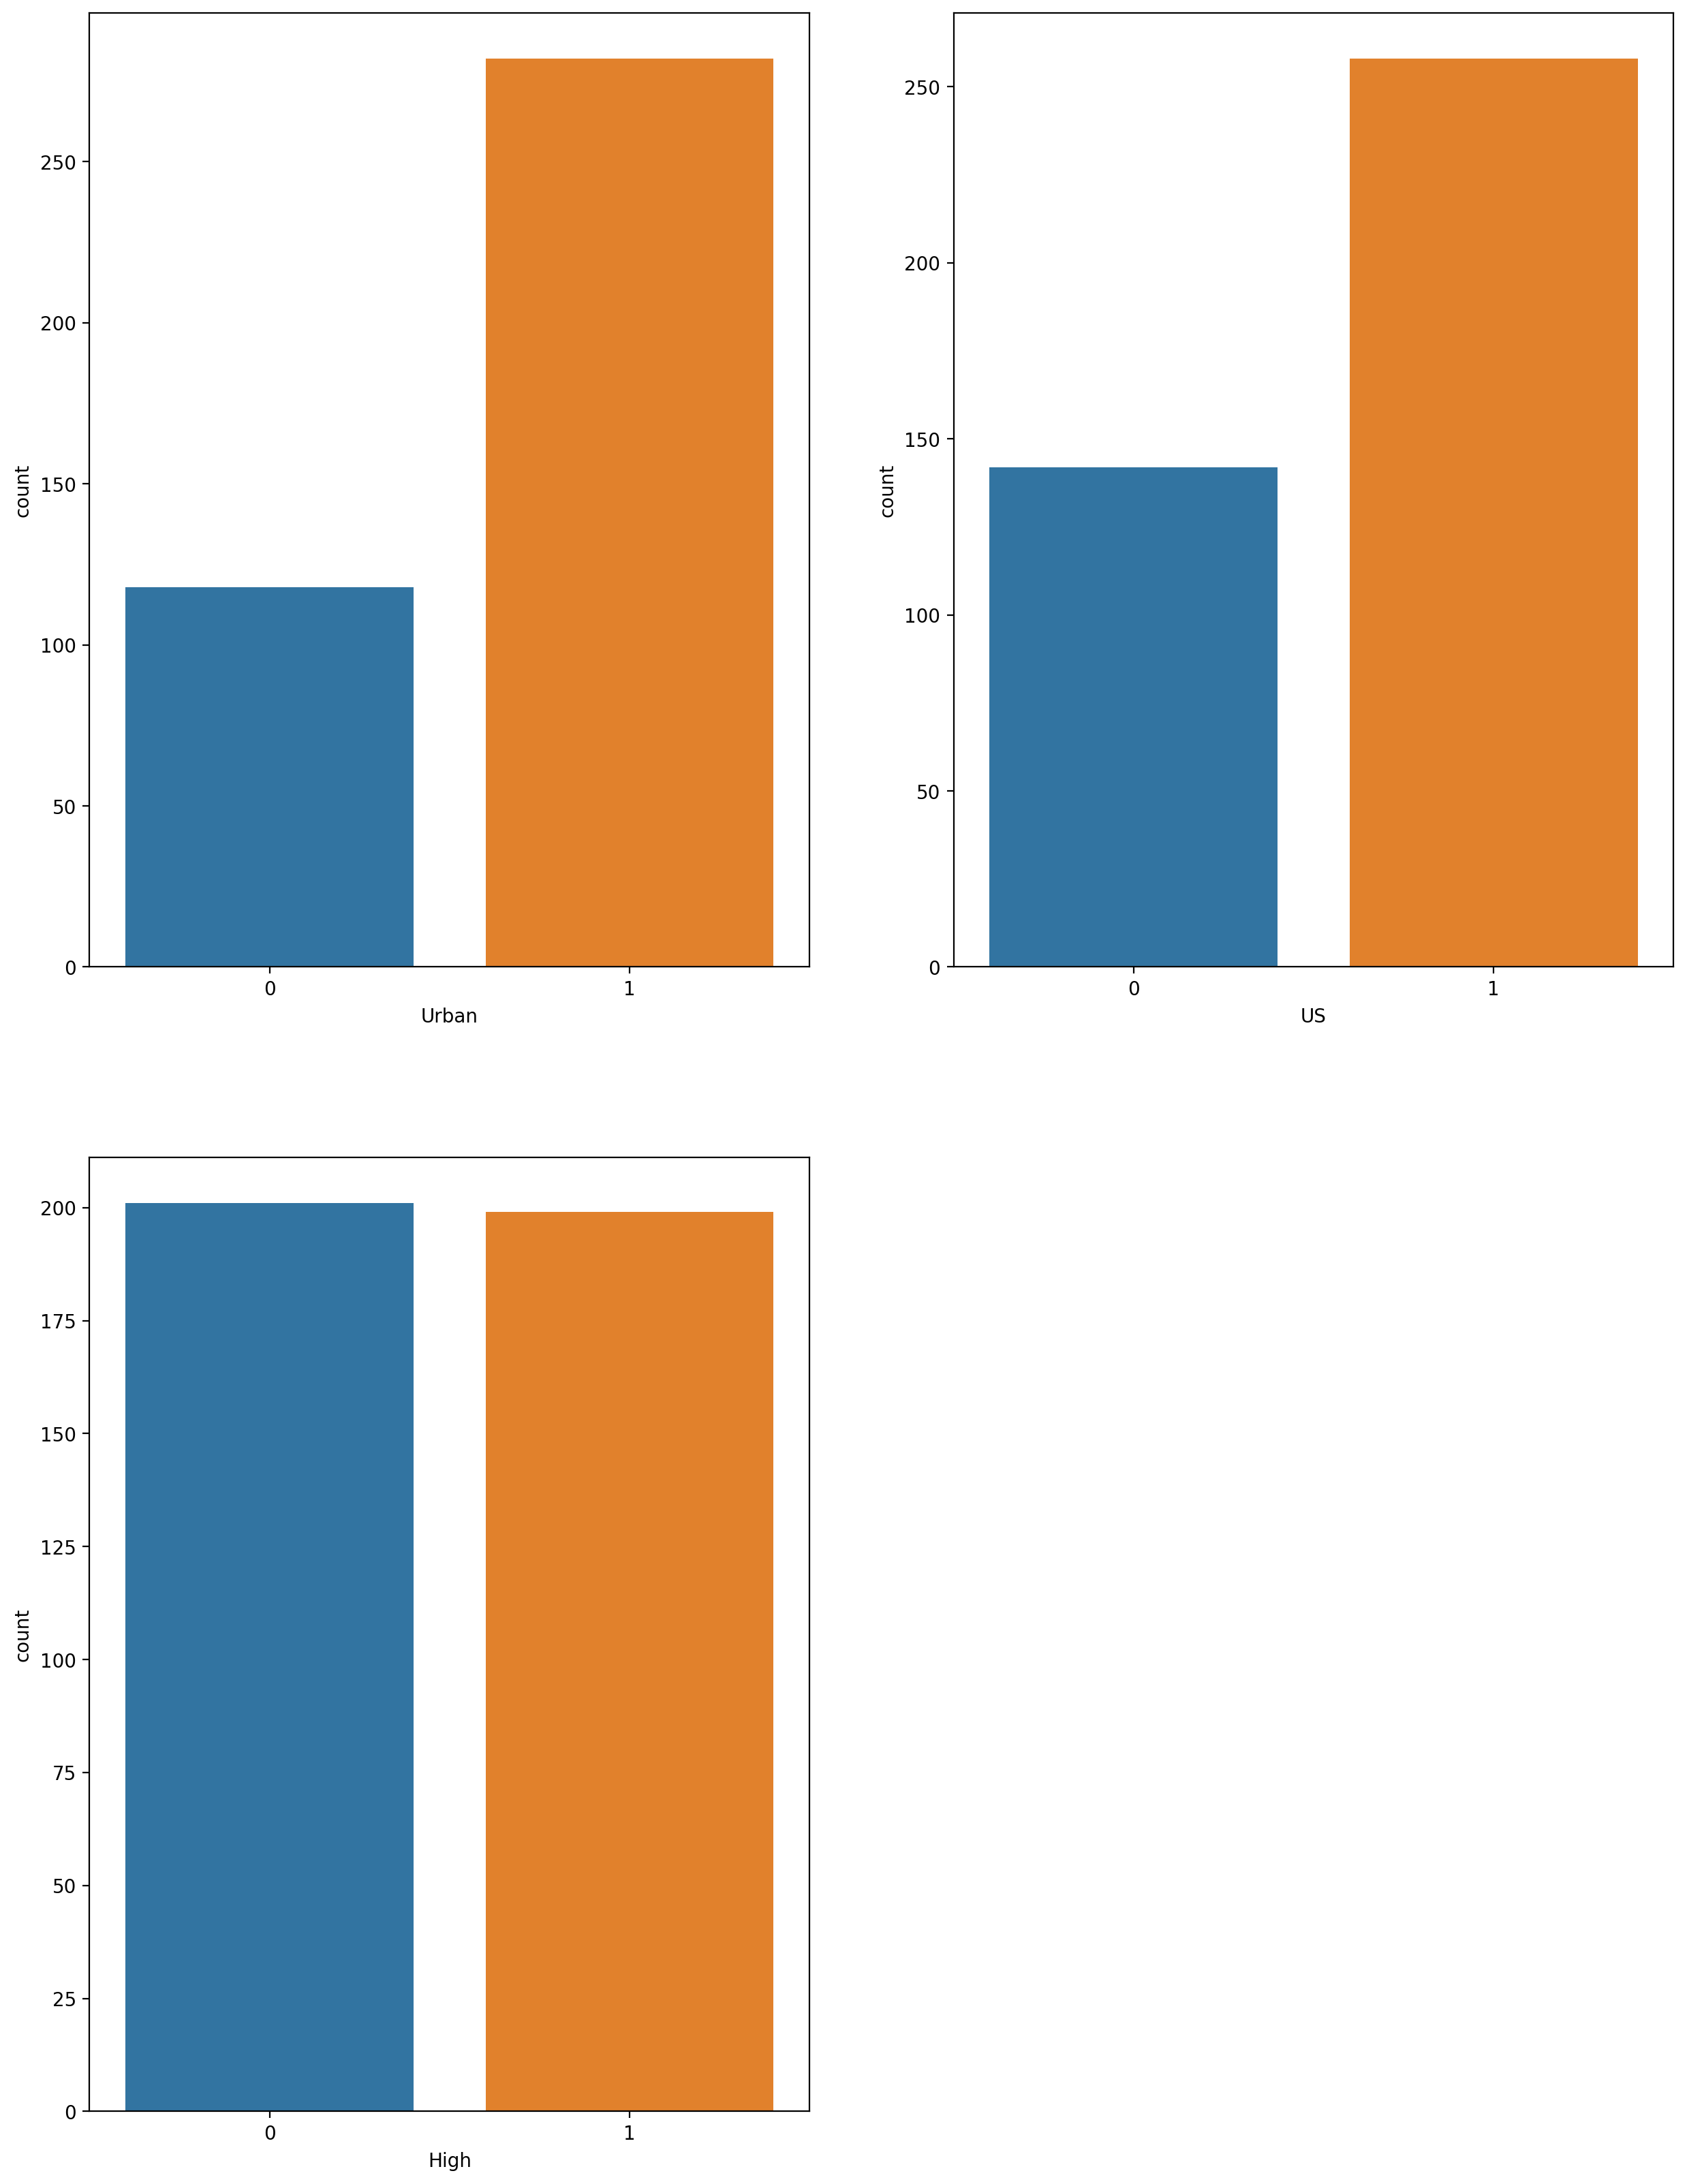

In [33]:
plt.subplot(2,2,1)
sns.countplot(df['Urban'])

plt.subplot(2,2,2)
sns.countplot(df['US'])

plt.subplot(2,2,3)
sns.countplot(df['High'])

In [11]:
x = df.iloc[:,1:11]
y = df['High']

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        40
           1       0.75      0.82      0.79        40

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



In [18]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.775


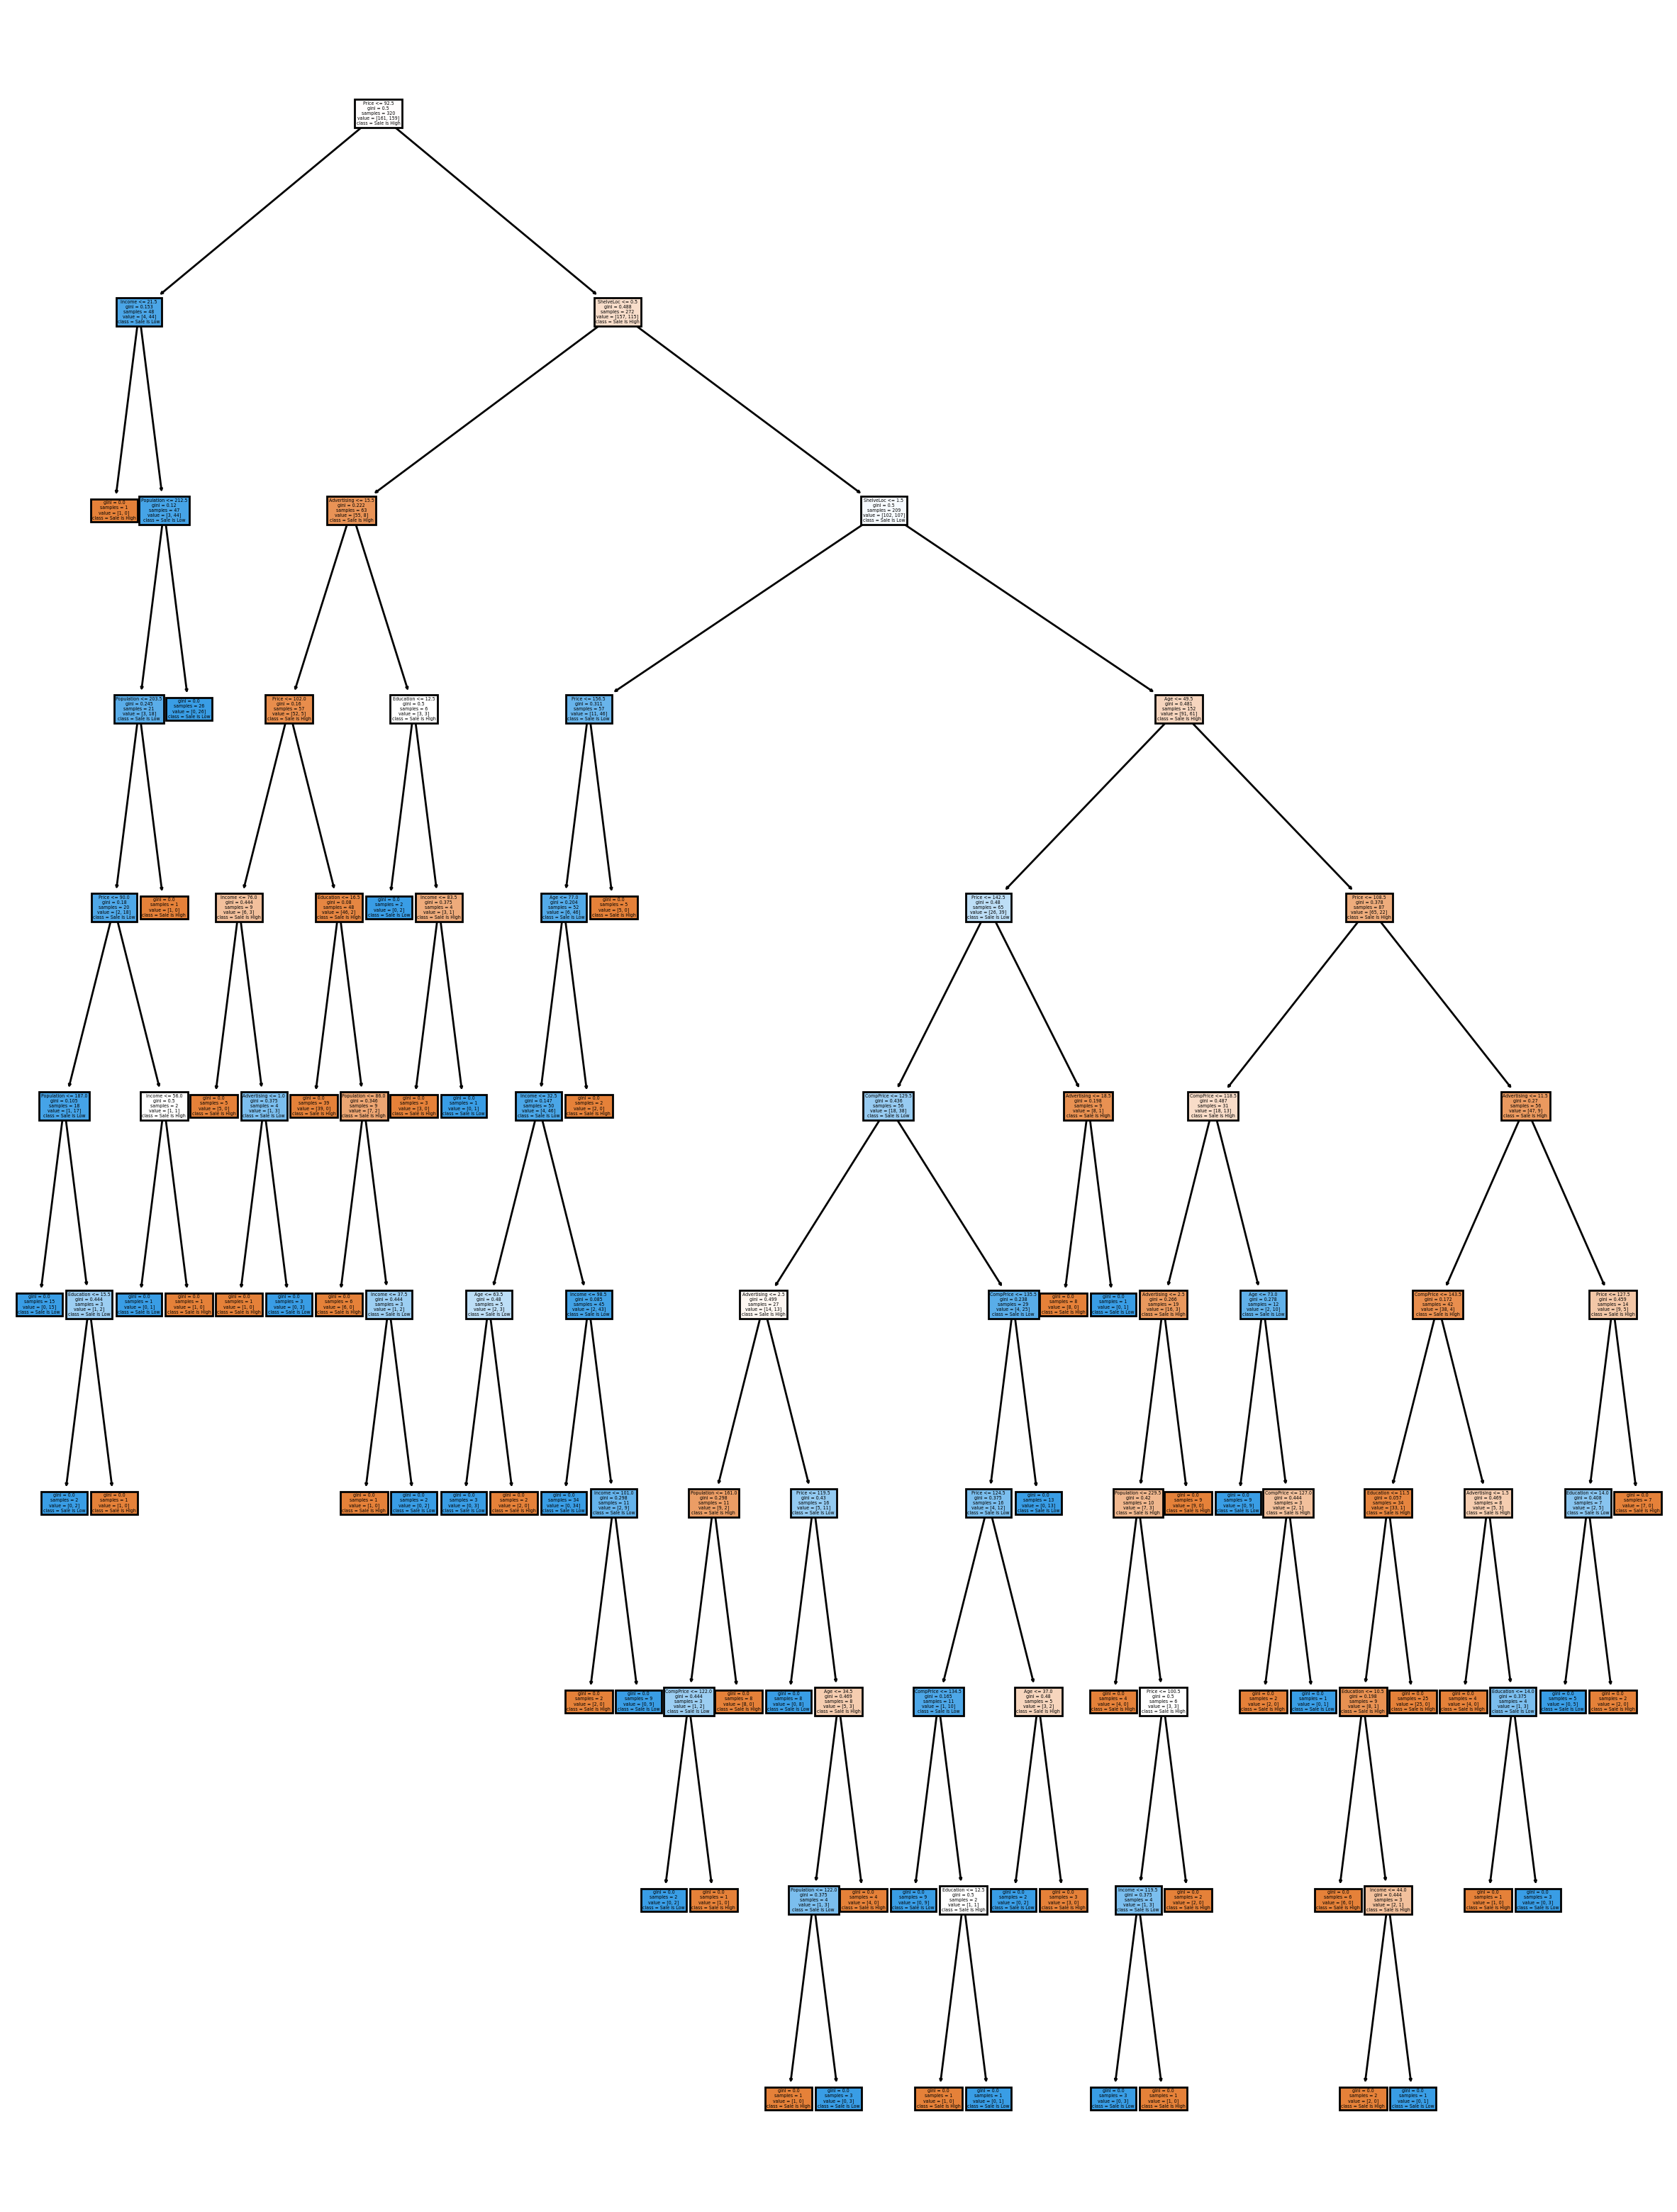

In [19]:
tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Sale is High','Sale is Low'],
              filled=True)
plt.show()

# Hyperparameter Tuning

In [20]:
dt= DecisionTreeClassifier()

param= {
    'criterion': ['gini','entropy'],
    'splitter':['random','best'],
    'max_depth':[1,2,3,],
     'min_samples_split':[2,3,4,6,8]
}

In [21]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,verbose=1)

In [22]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'splitter': ['random', 'best']},
             verbose=1)

In [23]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 6,
 'splitter': 'random'}

In [24]:
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=2,
                           max_depth=3, splitter='random')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [25]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.715625
Testing Accuracy:  0.7


In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        40
           1       0.75      0.60      0.67        40

    accuracy                           0.70        80
   macro avg       0.71      0.70      0.70        80
weighted avg       0.71      0.70      0.70        80



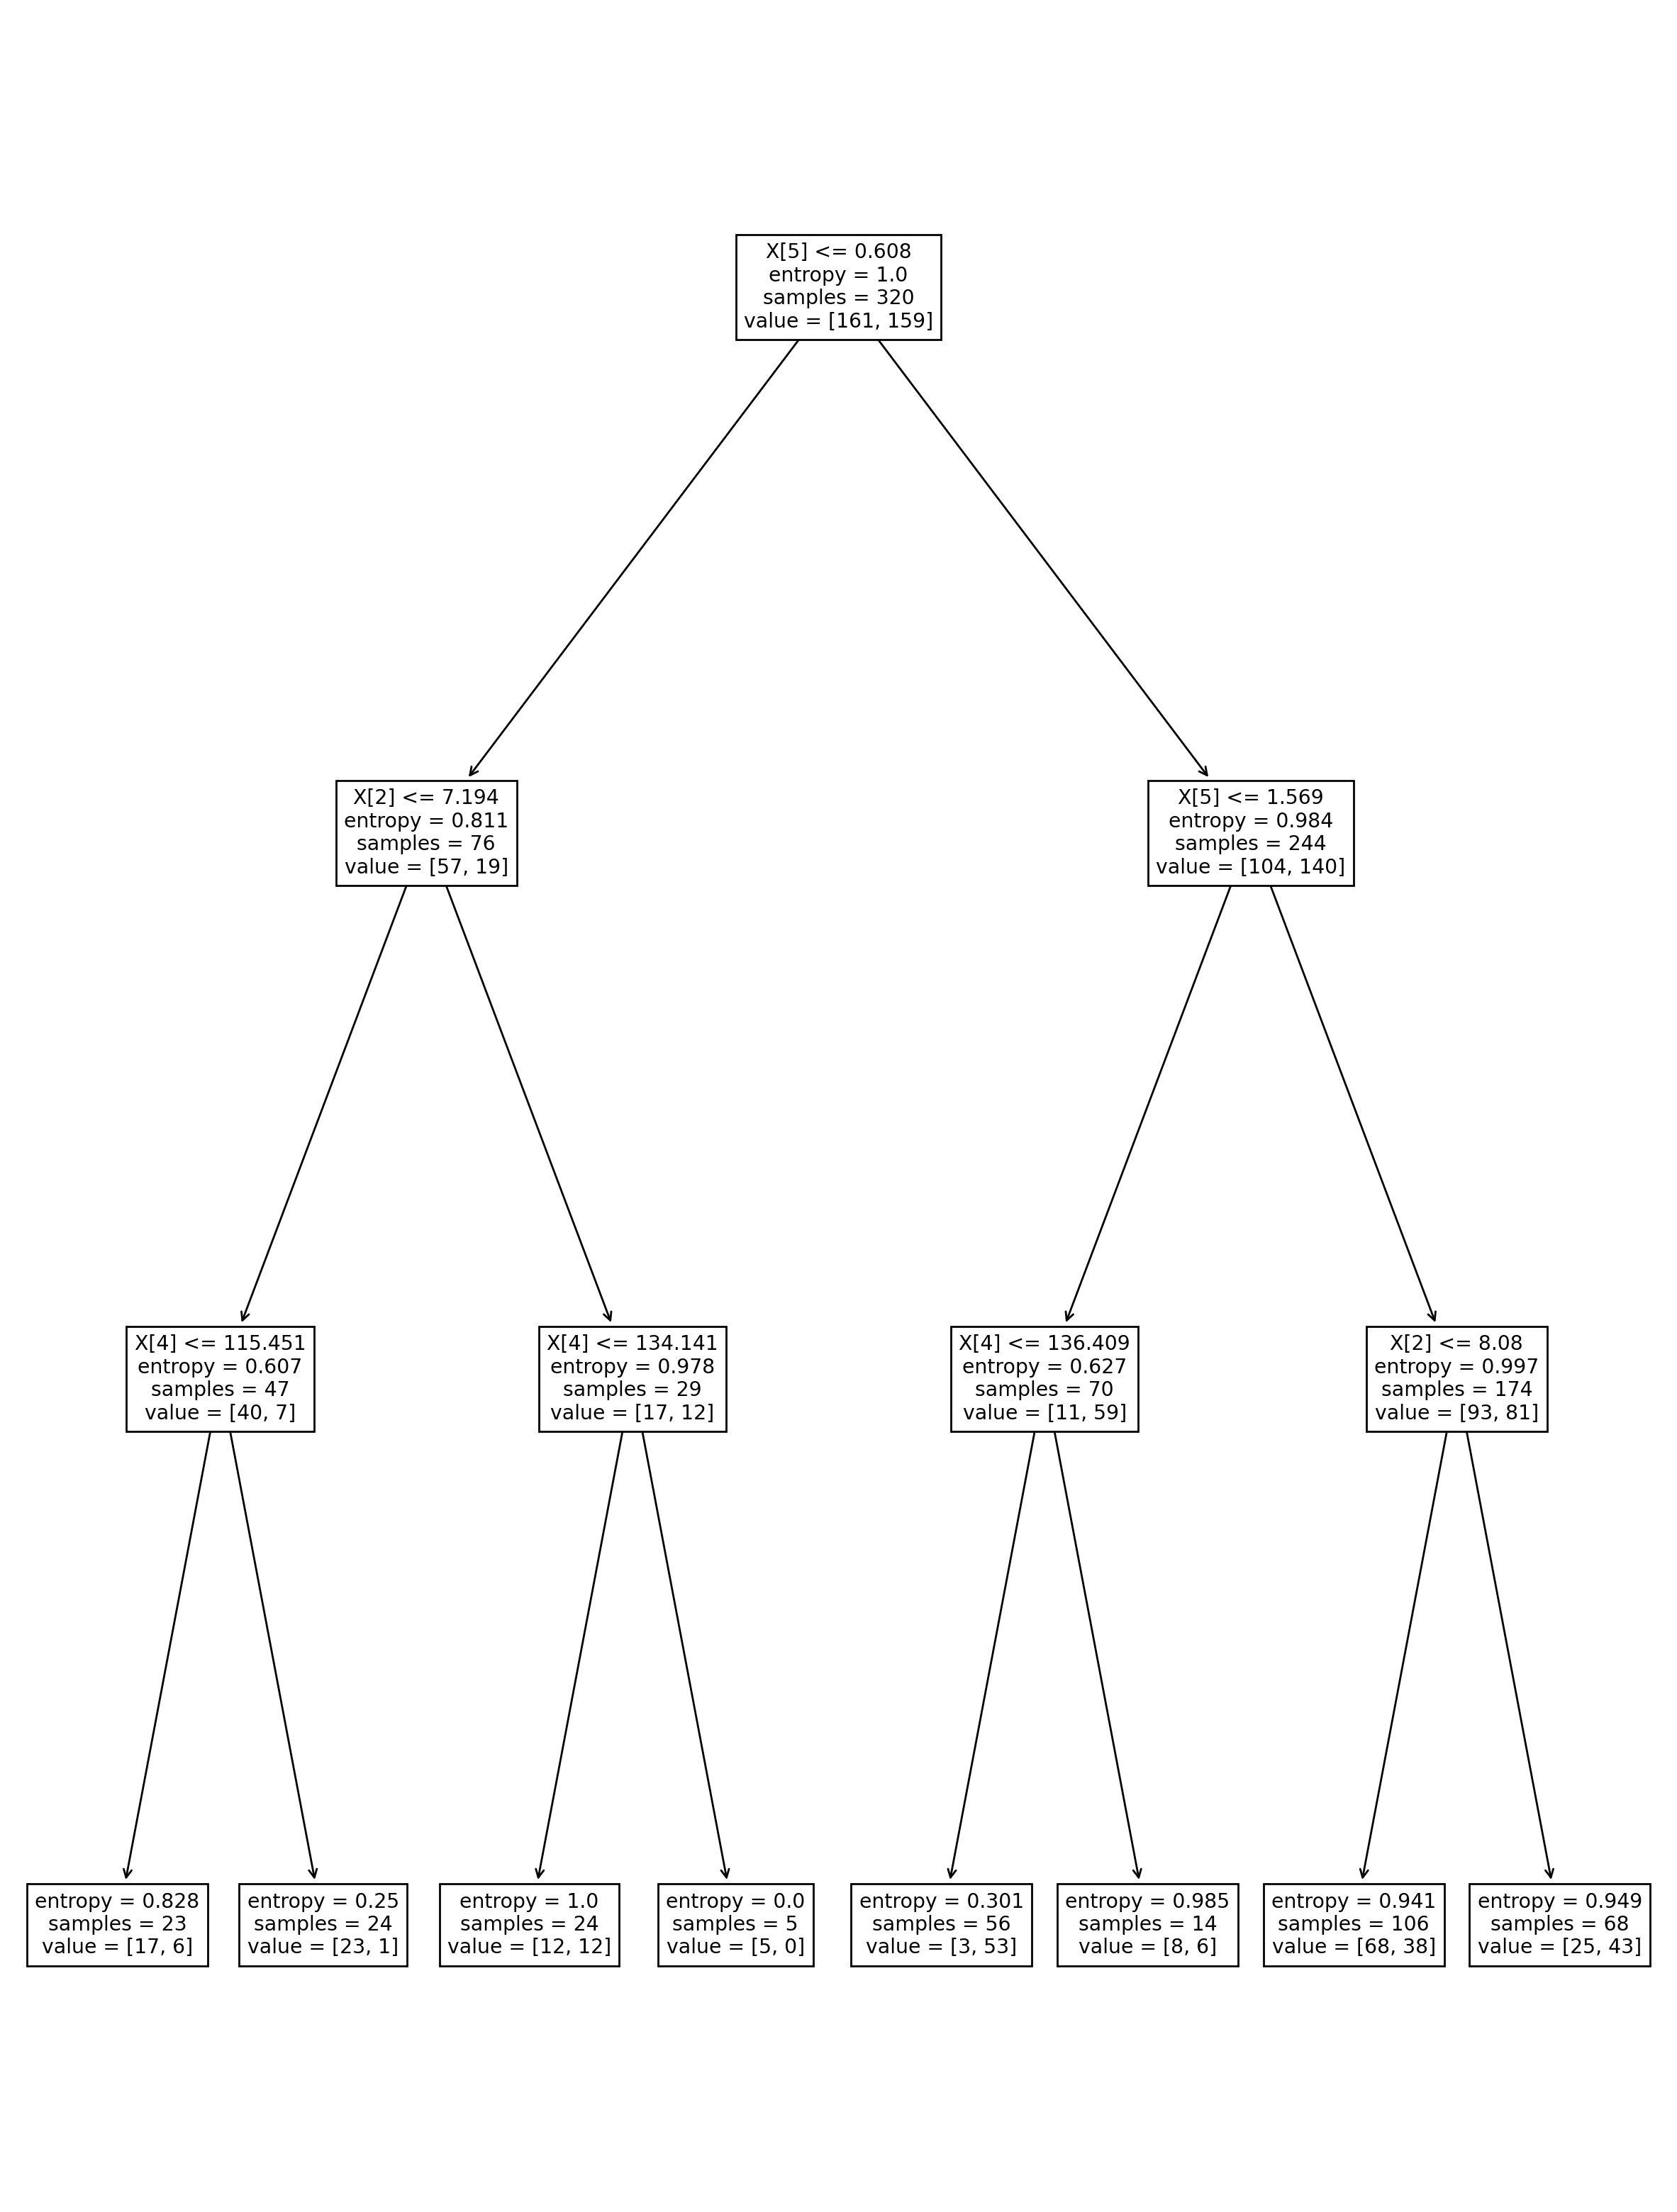

In [34]:
tree.plot_tree(dt)
plt.show()

# Here we have Generalize Model,with Accuracy 
## Training Accuracy:-   73.35%
## Testing Accuracy:-   81.25%